# Drug Prediction

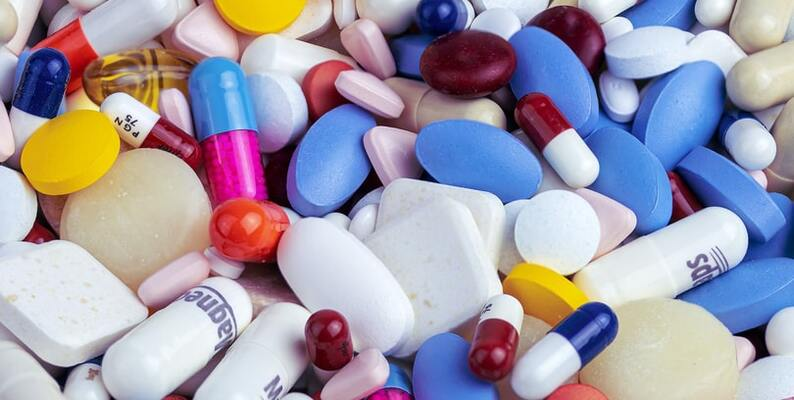

## Objective
- In this project, I aim to build a multiclass classification model to predict the most suitable drug for patients with a specific illness. Using features like Age, Sex, Blood Pressure, and Cholesterol, I will train a Decision Tree classifier on patient data where each responded to one of five drugs: Drug A, B, C, X, or Y. The goal is to accurately recommend a drug for future patients based on their medical profile.

### Step 1: Data Loading and Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
drug_data = pd.read_csv('drug200.csv')
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# Checking for the shape of the data
drug_data.shape
print(f'The dataset has {drug_data.shape[0]} rows and {drug_data.shape[1]} columns')

The dataset has 200 rows and 6 columns


In [8]:
# Descriptive Statistics for Numerical Columns
print('Numerical Columns Descriptive Stats')
display(drug_data.describe(exclude='object').T)

print('---'*30)
print('Categorical columns Descriptive Stats')
display(drug_data.describe(include='object').T)

Numerical Columns Descriptive Stats


,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


------------------------------------------------------------------------------------------
Categorical columns Descriptive Stats


,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,drugY,91


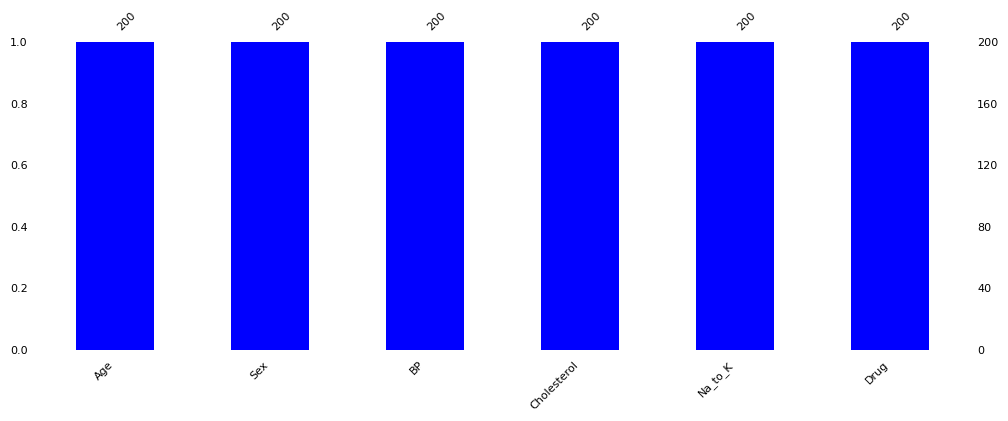

In [16]:
# Checking for missing values
import missingno as msno
msno.bar(drug_data, figsize=(12,4), color='Blue', fontsize=8, labels=True)
plt.show()


In [18]:
# Checking for duplicates
duplicates = drug_data.duplicated().sum()
print(f'The dataset has {duplicates} duplicates')

The dataset has 0 duplicates


In [19]:
# Checking the information about the dataset
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Step 2: Exploratory Data Analysis

In [20]:
drug_data.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


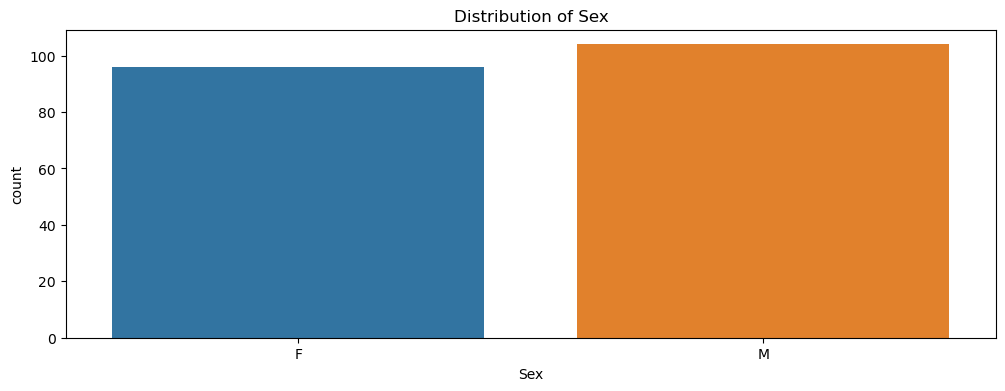

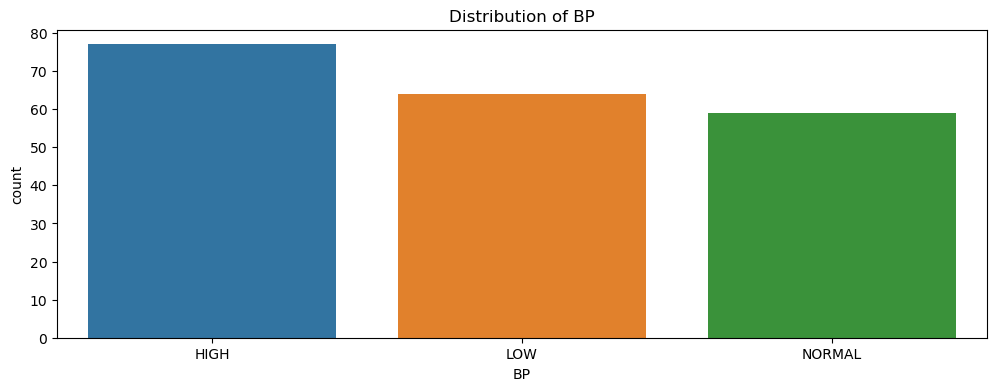

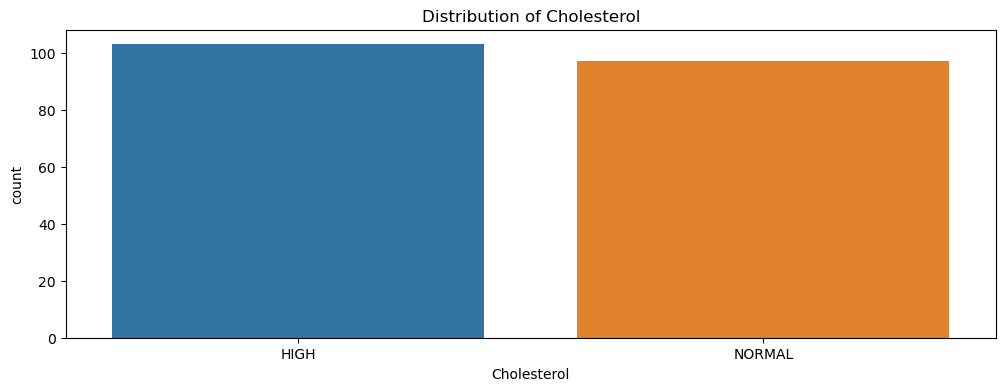

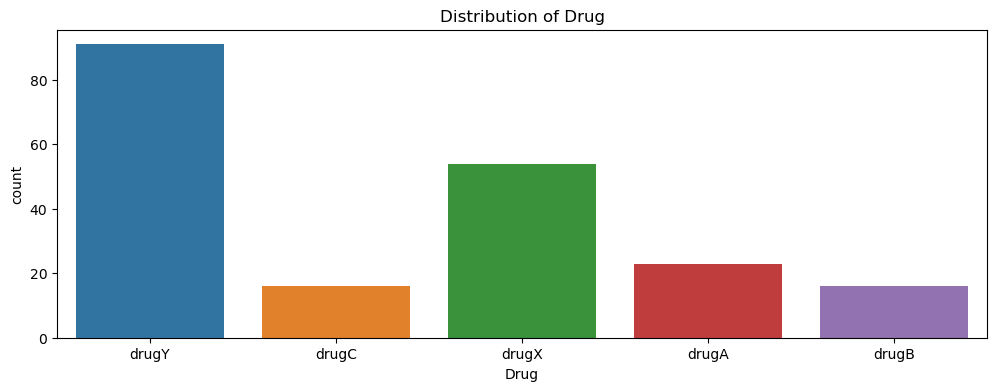

In [25]:
for i in drug_data.select_dtypes(include='object').columns:
    plt.figure(figsize=(12,4),)
    sns.countplot(drug_data[i])
    plt.title('Distribution of ' + i)


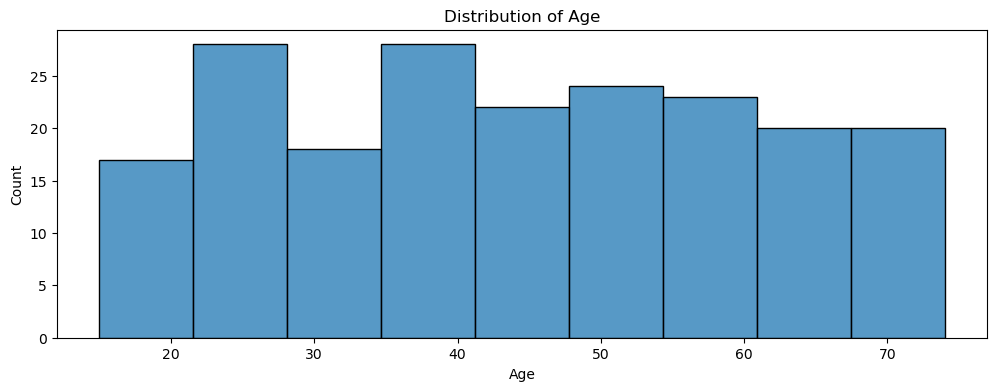

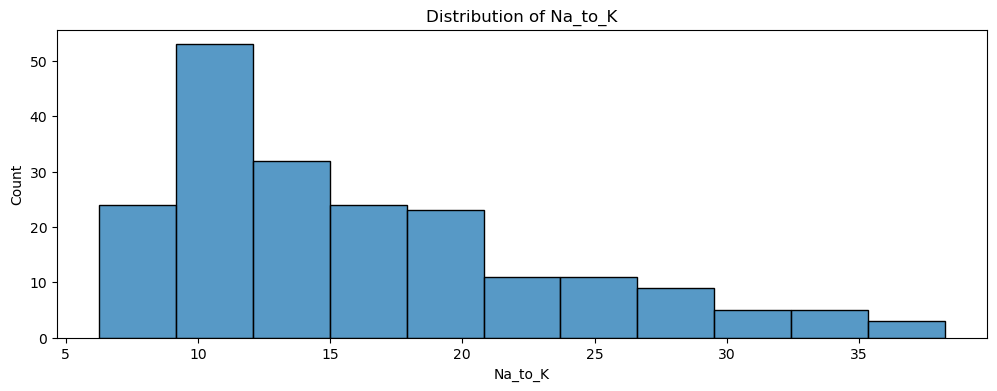

In [23]:
for i in drug_data.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(12,4))
    sns.histplot(drug_data[i])
    plt.title('Distribution of ' + i)


### Step 3: Data Preprocessing

In [26]:
# Splitting the data into features and target
X = drug_data.drop('Drug', axis=1)

y = drug_data['Drug']

In [27]:
# Transforming the X and y variable
X_scaled = pd.get_dummies(X, drop_first=True)
X_scaled.head(2)

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0


In [28]:
# Converting all columns to lower case
X_scaled.columns = X_scaled.columns.str.lower()
X_scaled.head(2)

,age,na_to_k,sex_m,bp_low,bp_normal,cholesterol_normal
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0


In [30]:
# Labeling the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_scaled = le.fit_transform(y)

In [32]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 6)

(40, 6)

(160,)

(40,)

### Step 4: Model Building ----> DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Fitting the training set
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Predictions
dtree_pred = dtree.predict(X_test)
dtree_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

[Text(0.75, 0.9, 'na_to_k <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]\nclass = drugY'),
 Text(0.625, 0.7, 'bp_normal <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]\nclass = drugX'),
 Text(0.5, 0.5, 'bp_low <= 0.5\ngini = 0.743\nsamples = 53\nvalue = [17, 13, 11, 12, 0]\nclass = drugA'),
 Text(0.25, 0.3, 'age <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugA'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugB'),
 Text(0.75, 0.3, 'cholesterol_normal <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]\nclass = drugX'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]\nclass = drugC'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]\nclass = drugX'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]\nclass = drugX'),
 Text(0.875,

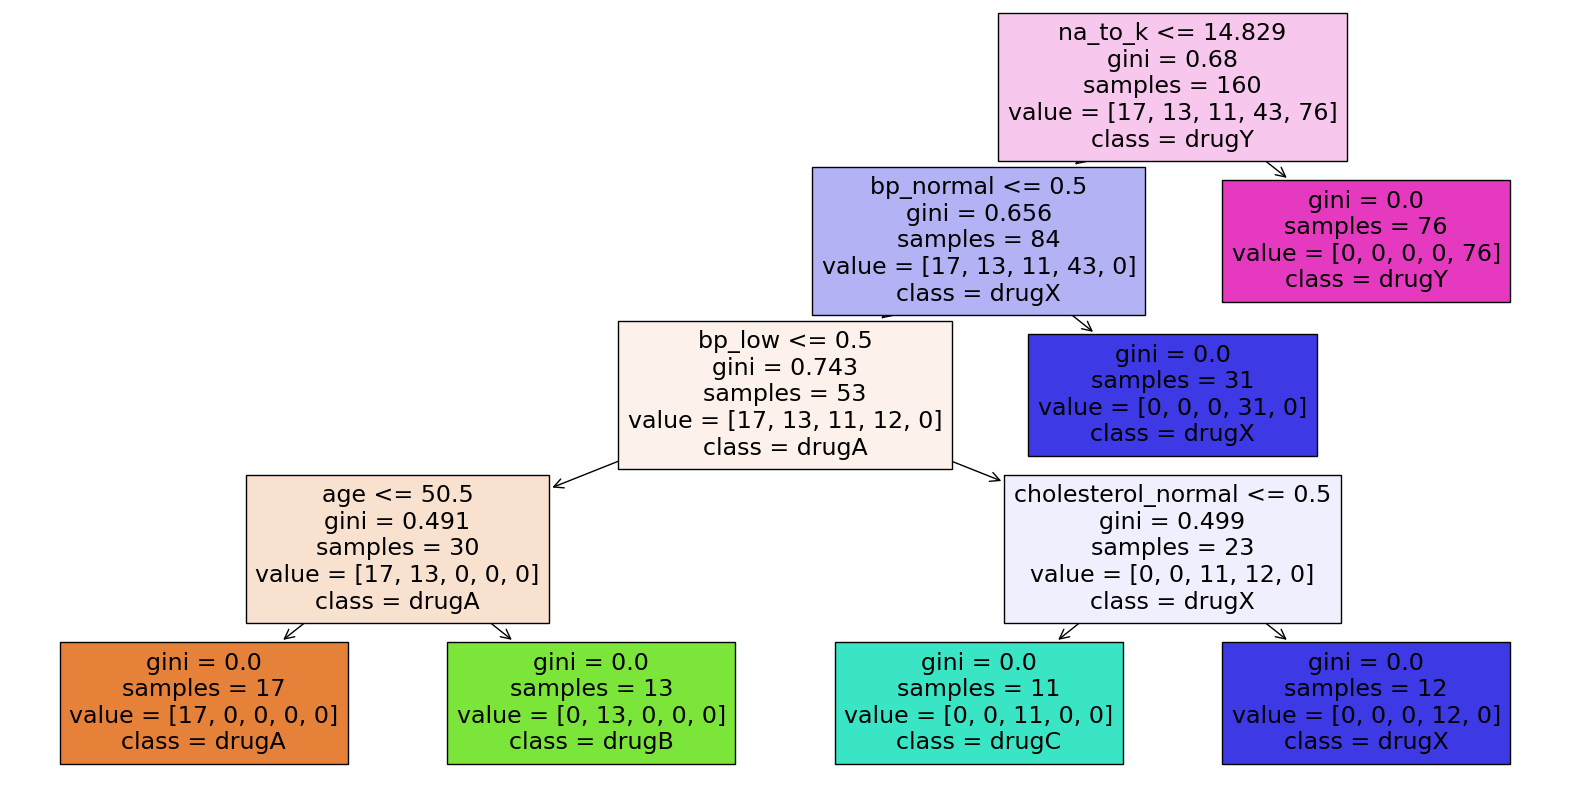

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X_scaled.columns, class_names=le.classes_, filled=True)

### Step 5: Evaluation

Accuracy Score: 1.0
------------------------------------------------------------------------------------------
Classification Report:/n               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



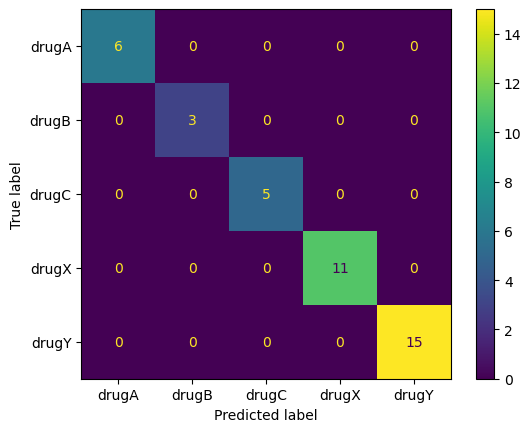

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
print('Accuracy Score:', accuracy_score(y_test, dtree_pred))
print('---'*30)
print('Classification Report:/n', classification_report(y_test, dtree_pred))

cm = confusion_matrix(y_test, dtree_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

### Step 6: Hyperparameter Tuning

In [40]:
tuned_dtree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [41]:
tuned_dtree.fit(X_train, y_train)
tuned_dtree_pred = tuned_dtree.predict(X_test)
tuned_dtree_pred

array([3, 4, 3, 3, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 0, 4, 0, 3, 3, 4, 0, 3,
       3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 0, 4, 3, 0, 4, 0])

[Text(0.6666666666666666, 0.875, 'na_to_k <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]\nclass = drugY'),
 Text(0.5, 0.625, 'bp_normal <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]\nclass = drugX'),
 Text(0.3333333333333333, 0.375, 'bp_low <= 0.5\ngini = 0.743\nsamples = 53\nvalue = [17, 13, 11, 12, 0]\nclass = drugA'),
 Text(0.16666666666666666, 0.125, 'gini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugA'),
 Text(0.5, 0.125, 'gini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]\nclass = drugX'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]\nclass = drugX'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]\nclass = drugY')]

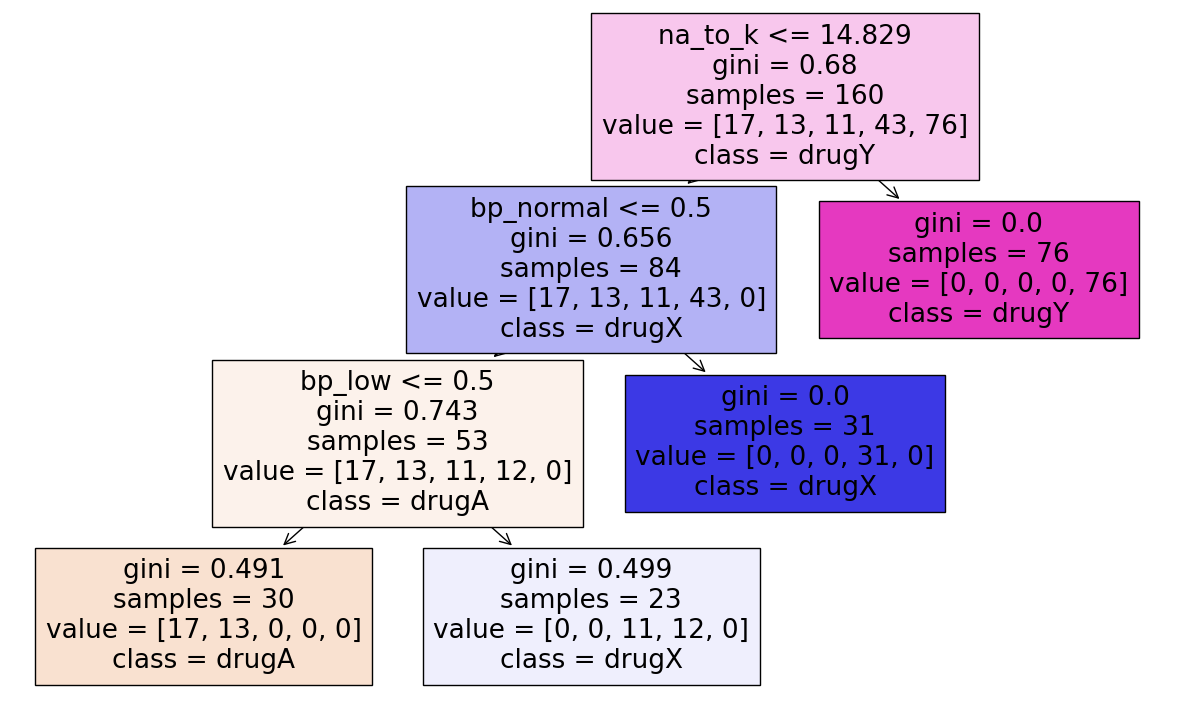

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,9))
plot_tree(tuned_dtree, feature_names=X_scaled.columns, class_names=le.classes_, filled=True)

Accuracy Score: 0.8
------------------------------------------------------------------------------------------
Classification Report:/n               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.69      1.00      0.81        11
           4       1.00      1.00      1.00        15

    accuracy                           0.80        40
   macro avg       0.47      0.60      0.52        40
weighted avg       0.66      0.80      0.72        40



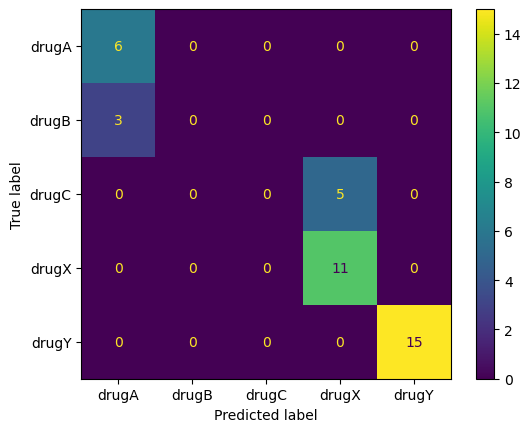

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
print('Accuracy Score:', accuracy_score(y_test, tuned_dtree_pred))
print('---'*30)
print('Classification Report:/n', classification_report(y_test, tuned_dtree_pred))

cm = confusion_matrix(y_test, tuned_dtree_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()